# <u><center>MACHINE LEARNING MODELS</center></u>
____

**CONTENTS**    
    
1. [**Ridge Regression (Logistic Regression with L2 norm)**](#AP1)
2. [**Support Vector Classifier (SVC)**](#AP2)
3. [**Random Forest (RF)**](#AP3)
4. [**MLe-KCNQ2 (ensemble classifier)**](#AP4)
____


In [1]:
import utils
import numpy as np
import pandas as pd

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Upload the necessary data. This is the data resulting from all previous preprocessing steps: format homogenisation, outlier and missing value control, as well as elimination of duplicates; oversampling in the train set and categorical encoding in both train and test sets.

In [2]:
X_train_df = pd.read_csv("X_train_df_preprocessed.csv", header = "infer")
X_train = np.loadtxt("X_train_preprocessed.csv", delimiter = ",")
X_test = np.loadtxt("X_test_preprocessed.csv", delimiter = ",")
y_train = np.loadtxt("y_train.csv", delimiter = ",")
y_test = np.loadtxt("y_test.csv", delimiter = ",")

<br>
<br>

## 1. Ridge Regression (Logistic Regression with L2 norm) <a id = "AP1"></a>

The best LR2 model is shown after prior hyperparameter fitting with GridSearch:

AUC-ROC VALUES:

             Roc-auc
     Train      0.92
      Test      0.89
[[0.9161436201317688], [0.8926282051282051]]


CONFUSION MATRIX:
Train:


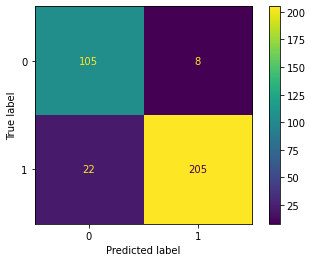

Test:


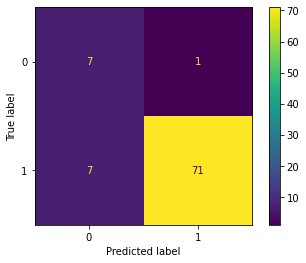



SENSITIVITY AND SPECIFICITY METRICS:
Train set:

· Sensitivity (pathogenic): 90.31%
· Specificity (benign): 92.92%

Test set:

· Sensitivity (pathogenic): 91.03%
· Specificity (benign): 87.5%


In [3]:
# Select the most informative 45 features
X_train_fs, X_test_fs, featLR, posLR = utils.select_features(X_train, 
                                                               X_train_df, 
                                                               y_train,
                                                               X_test, 
                                                               n = 45) 

# Create and fit a pipeline for the model
pipeline_LR2 = Pipeline( [("scaler", StandardScaler()), \
                          ("logistic", LogisticRegression(solver = "saga",
                                                          penalty = "l2",
                                                          max_iter = 10000,
                                                          class_weight = {0: 3, 1: 2},
                                                          multi_class = "ovr",
                                                          C = 2.91,
                                                          random_state = 8))] ) 
pipeline_LR2.fit(X_train_fs, y_train)


# Evaluate the model 
print("AUC-ROC VALUES:\n")
print(utils.get_roc_auc_score(pipeline_LR2, X_train_fs, y_train, X_test_fs, y_test, print_table=True))
print("\n\nCONFUSION MATRIX:")
print("Train:")
sens_tr, spec_tr = utils.metrics(pipeline_LR2, X_train_fs,y_train)
print("Test:")
sens_te, spec_te = utils.metrics(pipeline_LR2, X_test_fs,y_test)
print("\n\nSENSITIVITY AND SPECIFICITY METRICS:")
print("Train set:\n") 
print("· Sensitivity (pathogenic): {}%".format(sens_tr))
print("· Specificity (benign): {}%".format(spec_tr))
print("\nTest set:\n") 
print("· Sensitivity (pathogenic): {}%".format(sens_te))
print("· Specificity (benign): {}%".format(spec_te))

Finally, the most relevant features in the pathogenicity prediction of the LR2 model can be represented:

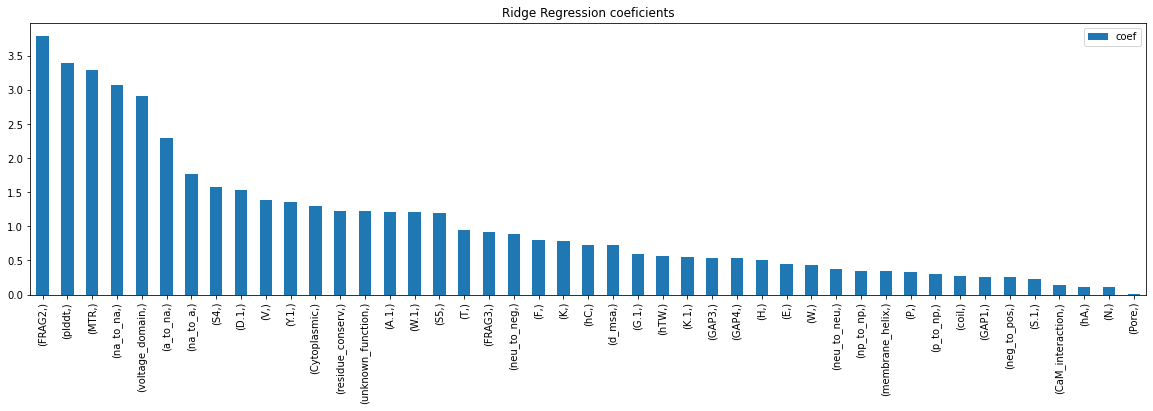

In [4]:
log_odds = pipeline_LR2.named_steps["logistic"].coef_[0]

x = pd.DataFrame(abs(log_odds), 
             featLR, 
             columns=["coef"])\
            .sort_values(by='coef', ascending=False).plot.bar(figsize=(20, 5))
plt.title("Ridge Regression coeficients")
plt.show()

(\*) If the "initial_aa" is an Alanine it is represented as "A", but if the "final_aa" is an Alanine it is wrote as "A.1".

<br>
<br>

## 2. Support Vector Classifier (SVC) <a id = "AP2"></a>

The best SVC model is shown after prior hyperparameter fitting with GridSearch:

AUC-ROC VALUES:

             Roc-auc
     Train      0.90
      Test      0.89
[[0.9028302990136838], [0.8862179487179487]]


CONFUSION MATRIX:
Train:


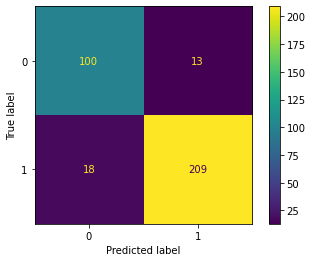

Test:


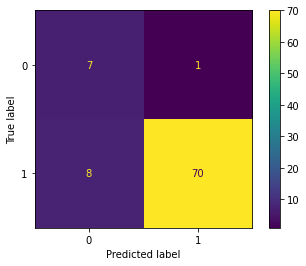



SENSITIVITY AND SPECIFICITY METRICS:
Train set:

· Sensitivity (pathogenic): 92.07%
· Specificity (benign): 88.5%

Test set:

· Sensitivity (pathogenic): 89.74%
· Specificity (benign): 87.5%


In [5]:
# Select the most informative 45 features
X_train_fs, X_test_fs, featSVC, posSVC = utils.select_features(X_train, 
                                                               X_train_df, 
                                                               y_train,
                                                               X_test, 
                                                               n = 45) 

# Create and fit a pipeline for the model
pipeline_SVC = Pipeline( [("scaler", StandardScaler()), \
                          ("SVC", SVC(kernel = "linear", 
                                      class_weight= {0:1, 1:1},
                                                     probability=True,
                                                     decision_function_shape = "ovr",
                                                     degree = 2,
                                                     gamma = "auto", 
                                                     C = 1,
                                                     random_state = 45))] )
pipeline_SVC.fit(X_train_fs, y_train)


# Evaluate the model 
print("AUC-ROC VALUES:\n")
print(utils.get_roc_auc_score(pipeline_SVC, X_train_fs, y_train, X_test_fs, y_test, print_table=True))
print("\n\nCONFUSION MATRIX:")
print("Train:")
sens_tr, spec_tr = utils.metrics(pipeline_SVC, X_train_fs,y_train)
print("Test:")
sens_te, spec_te = utils.metrics(pipeline_SVC, X_test_fs,y_test)
print("\n\nSENSITIVITY AND SPECIFICITY METRICS:")
print("Train set:\n") 
print("· Sensitivity (pathogenic): {}%".format(sens_tr))
print("· Specificity (benign): {}%".format(spec_tr))
print("\nTest set:\n") 
print("· Sensitivity (pathogenic): {}%".format(sens_te))
print("· Specificity (benign): {}%".format(spec_te))

Finally, the most relevant features in the pathogenicity prediction of the SVC model can be represented:

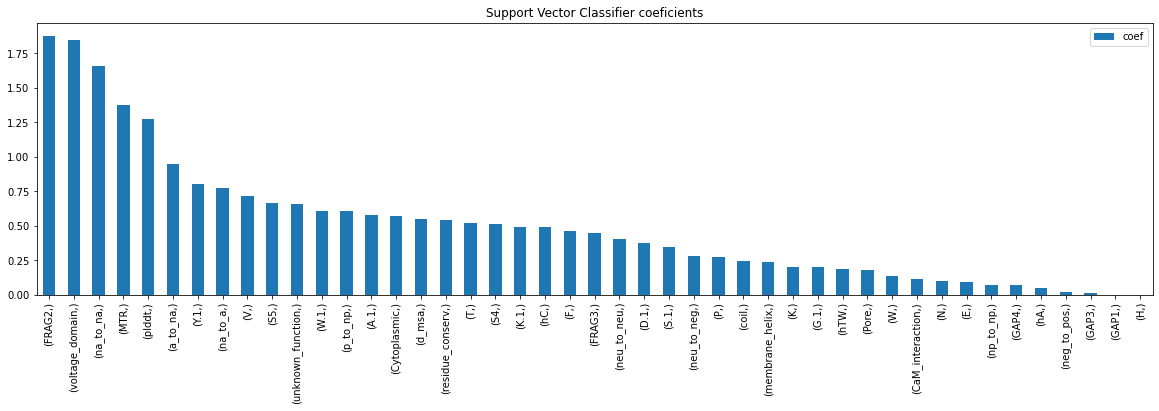

In [6]:
log_odds = pipeline_SVC.named_steps["SVC"].coef_[0]

pd.DataFrame(abs(log_odds), 
             featSVC, 
             columns=["coef"])\
            .sort_values(by='coef', ascending=False).plot.bar(figsize=(20, 5))
plt.title("Support Vector Classifier coeficients")
plt.show()

(\*) If the "initial_aa" is an Alanine it is represented as "A", but if the "final_aa" is an Alanine it is wrote as "A.1".

<br>
<br>

## 3. Random Forest (RF) <a id = "AP3"></a>

The best RF model is shown after prior hyperparameter fitting with GridSearch:

AUC-ROC VALUES:

             Roc-auc
     Train      0.88
      Test      0.87
[[0.8807843748781724], [0.8733974358974359]]


CONFUSION MATRIX:
Train:


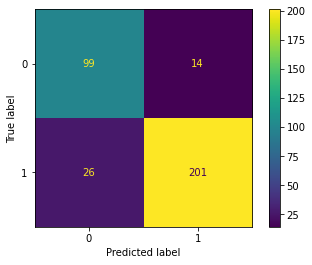

Test:


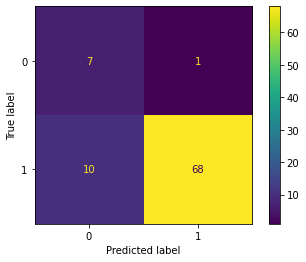



SENSITIVITY AND SPECIFICITY METRICS:
Train set:

· Sensitivity (pathogenic): 88.55%
· Specificity (benign): 87.61%

Test set:

· Sensitivity (pathogenic): 87.18%
· Specificity (benign): 87.5%


In [7]:
# Select the most informative 45 features
X_train_fs, X_test_fs, featRF, posRF = utils.select_features(X_train, 
                                                               X_train_df, 
                                                               y_train,
                                                               X_test, 
                                                               n = 45) 

# Create and fit a pipeline for the model
pipeline_RF = Pipeline( [("scaler", StandardScaler()), \
                         ("RF", RandomForestClassifier(max_depth = 3,
                                                       criterion = "log_loss",
                                                       max_features = "log2",
                                                       oob_score = False,
                                                       min_samples_split = 2,
                                                       class_weight= {0:3, 1:1},
                                                       random_state = 45))] )
pipeline_RF.fit(X_train_fs, y_train)


# Evaluate the model 
print("AUC-ROC VALUES:\n")
print(utils.get_roc_auc_score(pipeline_RF, X_train_fs, y_train, X_test_fs, y_test, print_table=True))
print("\n\nCONFUSION MATRIX:")
print("Train:")
sens_tr, spec_tr = utils.metrics(pipeline_RF, X_train_fs,y_train)
print("Test:")
sens_te, spec_te = utils.metrics(pipeline_RF, X_test_fs,y_test)
print("\n\nSENSITIVITY AND SPECIFICITY METRICS:")
print("Train set:\n") 
print("· Sensitivity (pathogenic): {}%".format(sens_tr))
print("· Specificity (benign): {}%".format(spec_tr))
print("\nTest set:\n") 
print("· Sensitivity (pathogenic): {}%".format(sens_te))
print("· Specificity (benign): {}%".format(spec_te))

Finally, the most relevant features in the pathogenicity prediction of the RF model can be represented:

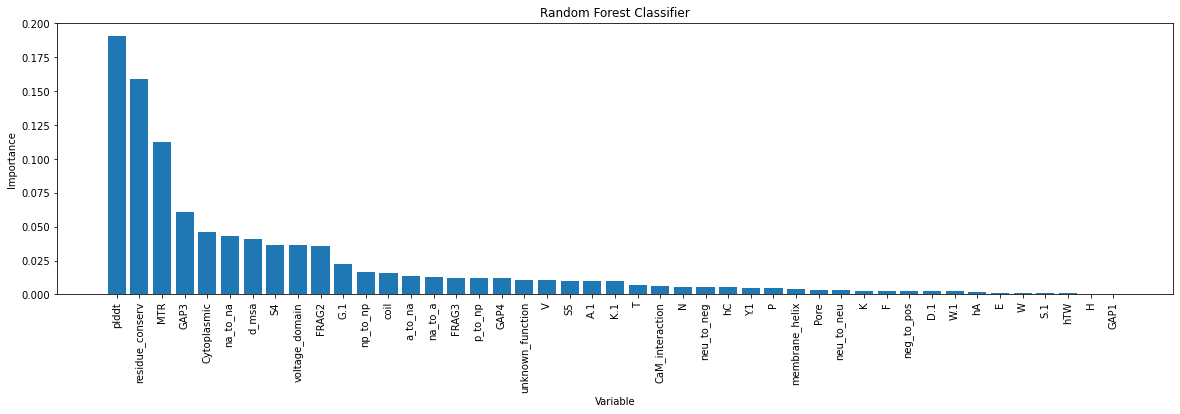

In [8]:
clean_featRF = []
for i in featRF:
    for j in i:
        clean_featRF.append(j)
        
importances = list(pipeline_RF.named_steps["RF"].feature_importances_)
x_values = list(range(len(importances)))

d = {}
for i in range(len(importances)):
    d[importances[i]] = clean_featRF[i]
    
imp_sort = sorted(importances, reverse=True)

l_imp = []
l_col = []
for i in range(len(imp_sort)):
    l_imp.append(imp_sort[i])
    l_col.append(d[imp_sort[i]])

plt.figure(figsize=(20,5))
plt.bar(x_values, l_imp, orientation = 'vertical')
plt.xticks(x_values, l_col, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Random Forest Classifier')
plt.show()

(\*) If the "initial_aa" is an Alanine it is represented as "A", but if the "final_aa" is an Alanine it is wrote as "A.1".

<br>
<br>

## 4. MLe-KCNQ2 (ensemble classifier) <a id = "AP4"></a>

A KCNQ2 ensemble machine learn model (MLe-KCNQ2) is created with the 3 models above. For this purpose, the [`VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) sklearn class is used. The best MLe-KCNQ2 model is shown after prior hyperparameter fitting with GridSearch:

AUC-ROC VALUES:

             Roc-auc
     Train      0.92
      Test      0.89
[[0.920548906475381], [0.8926282051282051]]


CONFUSION MATRIX:
Train:


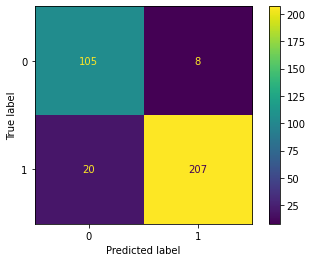

Test:


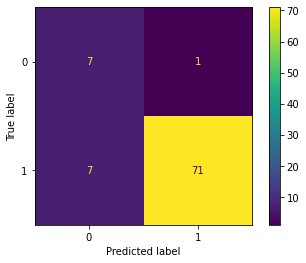



SENSITIVITY AND SPECIFICITY METRICS:
Train set:

· Sensitivity (pathogenic): 91.19%
· Specificity (benign): 92.92%

Test set:

· Sensitivity (pathogenic): 91.03%
· Specificity (benign): 87.5%


In [9]:
# Select the most informative 45 features
X_train_fs, X_test_fs, featEn, posEn = utils.select_features(X_train, 
                                                               X_train_df, 
                                                               y_train,
                                                               X_test, 
                                                               n = 45) 

# Create and fit a pipeline for the model
pipeline_ensemble_soft = Pipeline( [("scaler", StandardScaler()), \
                                    ("Ensemble_soft", 
                                     VotingClassifier(voting = "soft",
                                                      weights = [1,0.5,1.75],
                                                      estimators=[
                                                                           
                                                          ("logistic", LogisticRegression(solver = "saga",
                                                                                          penalty = "l2",
                                                                                          max_iter = 10000,
                                                                                          class_weight = {0: 3, 1: 2},
                                                                                          multi_class = "ovr",
                                                                                          C = 2.91,
                                                                                          random_state = 8)),
                                                                           
                                                          ("SVC", SVC(kernel = "linear", 
                                                                      class_weight= {0:1, 1:1},
                                                                      probability=True,
                                                                      decision_function_shape = "ovr",
                                                                      degree = 2,
                                                                      gamma = "auto",
                                                                      C = 1,
                                                                      random_state = 45)),
                                                                           
                                                          ("RF", RandomForestClassifier(max_depth = 3,
                                                                                        criterion = "log_loss",
                                                                                        max_features = "log2",
                                                                                        oob_score = False,
                                                                                        min_samples_split = 2, 
                                                                                        class_weight= {0:3, 1:1},
                                                                                        random_state = 45))]))])
pipeline_ensemble_soft.fit(X_train_fs, y_train)

# Evaluate the model 
print("AUC-ROC VALUES:\n")
print(utils.get_roc_auc_score(pipeline_ensemble_soft, X_train_fs, y_train, X_test_fs, y_test, print_table=True))
print("\n\nCONFUSION MATRIX:")
print("Train:")
sens_tr, spec_tr = utils.metrics(pipeline_ensemble_soft, X_train_fs,y_train)
print("Test:")
sens_te, spec_te = utils.metrics(pipeline_ensemble_soft, X_test_fs,y_test)
print("\n\nSENSITIVITY AND SPECIFICITY METRICS:")
print("Train set:\n") 
print("· Sensitivity (pathogenic): {}%".format(sens_tr))
print("· Specificity (benign): {}%".format(spec_tr))
print("\nTest set:\n") 
print("· Sensitivity (pathogenic): {}%".format(sens_te))
print("· Specificity (benign): {}%".format(spec_te))